**Walmart Sales Data Analysis Project**
- 


**Dataset**: Walmart's sales from 2010 to 2012


**Objective**:
Gather insights from Walmart's sales data through:
- Performing sales performance analysis
- Determining the impact of holidays on sales numbers
- Discovering relationships between weather and sales
- Determining the influence of fuel prices on sales
- Exploring economic factors
- Identifing seasonal sales trends
- Comparing and benchmarking store performance

**Import Libraries and Read Dataset**
-

In [40]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [41]:
# Read Walmart Sales CSV

walmart_df = pd.read_csv('Walmart_sales.csv')
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**Checking and Cleaning Data**

In [42]:
# Checked for null values

check = walmart_df.isnull().sum()
print(check)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [43]:
# Checked for NA values

check2 = walmart_df.isna().sum()
print(check2)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [44]:
# Checked the data type of each column

check3 = walmart_df.dtypes
print(check3)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [45]:
# Converted "Date" column into datetime 

walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format = 'mixed', dayfirst = True)
walmart_df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [46]:
# Checked for duplicates

check4 = walmart_df.duplicated().sum()
print(check4)

0


**Sales Performance Analysis**
- 
- What are the total weekly sales for each store?
- Which stores are performing the best and worst in terms of total sales? 

In [47]:
# Calculated the total weekly sales for each store from 2010-2012 (2-years)
# Created a new dataframe for total weekly sales per store

all_stores = walmart_df['Store'].unique()
total_sales = []

def total_sales_func(a):
    sum_sls = walmart_df[walmart_df['Store'] == a]['Weekly_Sales'].sum().round()
    total_sales.append(sum_sls)

for i in all_stores:
    total_sales_func(i)
    
total_wk_sls_df = {
    'Store': all_stores,
    'Total Sales': total_sales
}

total_wk_sls_df = pd.DataFrame(total_wk_sls_df)
total_wk_sls_df.head(10) # Only showing 10 rows for aesthetic purposes


,Store,Total Sales
0,1,222402809.0
1,2,275382441.0
2,3,57586735.0
3,4,299543953.0
4,5,45475689.0
5,6,223756131.0
6,7,81598275.0
7,8,129951181.0
8,9,77789219.0
9,10,271617714.0


In [48]:
# Identified the best performing store 

max_value = total_wk_sls_df['Total Sales'].max()

best_store = total_wk_sls_df[total_wk_sls_df['Total Sales'] == max_value]
best_store

,Store,Total Sales
19,20,301397792.0


In [49]:
# Identified the worst perfroming store

min_value = total_wk_sls_df['Total Sales'].min()

worst_store = total_wk_sls_df[total_wk_sls_df['Total Sales'] == min_value]
worst_store

,Store,Total Sales
32,33,37160222.0


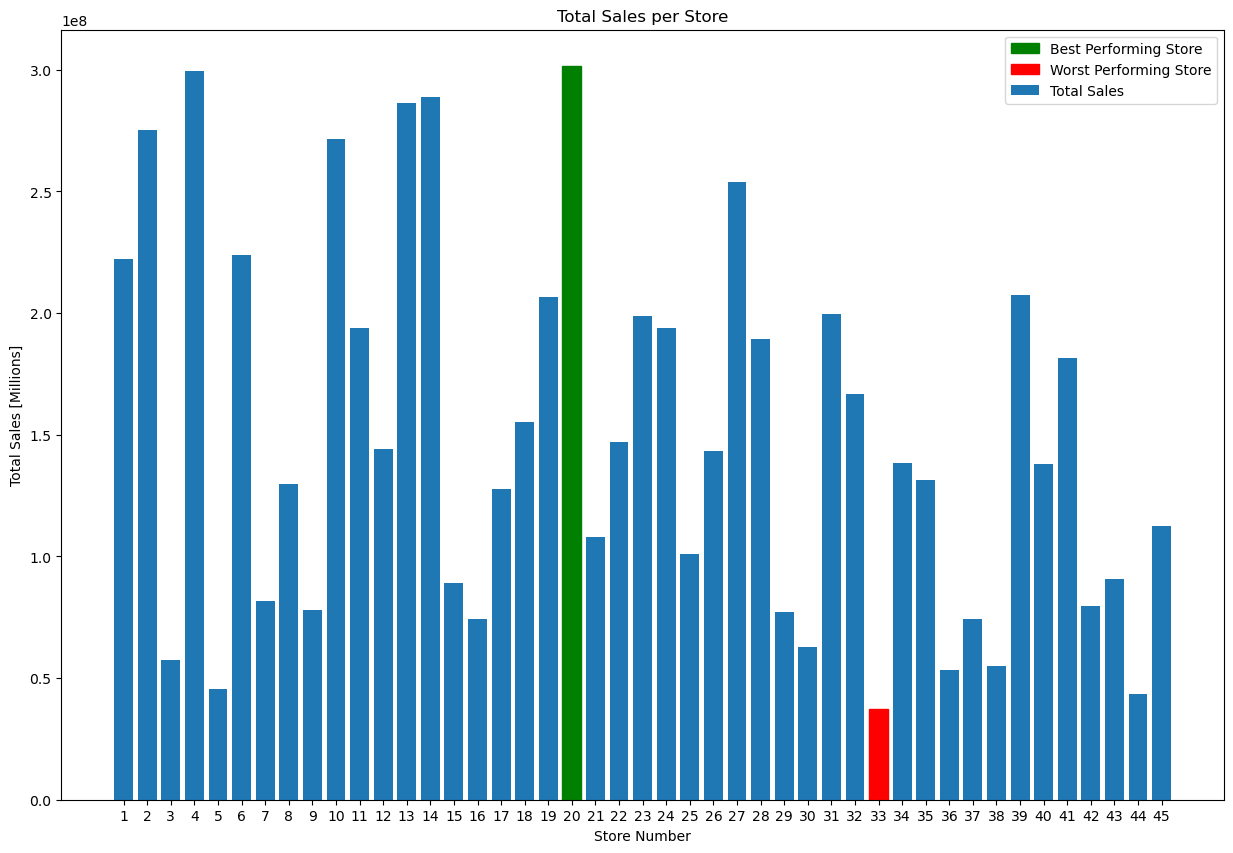

In [50]:
# Plotted a bar chart highlighting the best and worst performing stores compared to other stores

x = total_wk_sls_df['Store']
y = total_wk_sls_df['Total Sales']

plt.figure(figsize=(15,10))

total_sls_bar = plt.bar(x,y, label = 'Total Sales')

for a,b in zip(total_sls_bar, total_wk_sls_df['Store']):
    if b == 20:
        a.set_color('Green')
        a.set_label('Best Performing Store')
    elif b == 33:
        a.set_color('Red')
        a.set_label('Worst Performing Store')
        
plt.title('Total Sales per Store')
plt.ylabel('Total Sales [Millions]')
plt.xlabel('Store Number')
plt.xticks(x)
plt.legend()
    

**Conclusion**
- Store 20 generated the most amount of sales at $301,397,792.0
- Store 33 generated the least amount of sales at $37,160,222.0
 

**Impact of Holidays on Sales**
-
- How do sales compare during holiday weeks versus non-holiday weeks? 
- Identify which holidays have the most significant impact on sales

In [51]:
# Calculated the total number of weeks for holidays and non-holiday weeks

def week_count(x):
    sum_sales = x['Weekly_Sales'].count()
    return sum_sales
            
no_holiday = walmart_df[walmart_df['Holiday_Flag'] == 0]
yes_holiday = walmart_df[walmart_df['Holiday_Flag'] == 1]

y = week_count(yes_holiday)
n = week_count(no_holiday)

print('Total number of weekly sales on non-holiday weeks:', f"{n:,}", '''
Total number of weekly sales on holiday weeks:''', f"{y:,}")


Total number of weekly sales on non-holiday weeks: 5,985 
Total number of weekly sales on holiday weeks: 450


In [52]:
# Calculated the average number of weekly sales during holiday weeks and non-holiday weeks

def avg_sales(x, weekcount):
    sum_x = x['Weekly_Sales'].sum()
    avg = sum_x/weekcount
    avg = int(avg)
    return avg

avg_holiday_sales = avg_sales(no_holiday, n)
avg_nonholiday_sales = avg_sales(yes_holiday, y)

difference = avg_nonholiday_sales - avg_holiday_sales

print('Average number of weekly sales during non-holidays:', f"{avg_nonholiday_sales:,}", '''
Average number of weekly sales during holidays:''', f"{avg_holiday_sales:,}",'''
Difference:''', f"{difference:,}")


Average number of weekly sales during non-holidays: 1,122,887 
Average number of weekly sales during holidays: 1,041,256 
Difference: 81,631


In [53]:
# Found the average total weekly sales for the dataset (2010-2012)
# Calculated the percent change for holiday weeks vs. non-holiday weeks

sum_WS = walmart_df['Weekly_Sales'].sum()
count_WS = walmart_df['Weekly_Sales'].count()
avg_total_WS = int(sum_WS/count_WS)

def p_change(x):
    percent = (x/avg_total_WS) * 100
    percent = int(percent)
    return percent

x = p_change(avg_nonholiday_sales)
y = p_change(avg_holiday_sales)

print('The average weekly sales for 2010-2012 is', f"{avg_total_WS:,}")
print('Non-holiday weekly sales:', x, "%")
print('Holiday weekly sales:', y, "%")
print('On average, non-holiday weeks outperform holiday weeks by approximately', x - y, '%')


The average weekly sales for 2010-2012 is 1,046,964
Non-holiday weekly sales: 107 %
Holiday weekly sales: 99 %
On average, non-holiday weeks outperform holiday weeks by approximately 8 %


In [54]:
# All holiday days fall in the month of: Feburary, September, November, and December
# Holiday dates identified as: Valentines Day, Labor Day, Thanksgiving, and Christmas

unique_holidays = yes_holiday['Date'].unique()
unique_holidays

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

In [55]:
# Calculated the the total number of sales for each holiday 

holiday_names = ['Valentines Day','Labor Day', 'Thanksgiving', 'Christmas']
holiday_months = [2, 9, 11, 12]

def total_holiday_sales(x,y):
    h_sales = walmart_df[(walmart_df['Date'].dt.month == x) & (walmart_df['Holiday_Flag'] == 1)]['Weekly_Sales'].sum().round()
    print('Total weekly sales for', y, 'is $', f"{h_sales:,}")


for a,b in zip(holiday_months, holiday_names):
    total_holiday_sales(a,b)

Total weekly sales for Valentines Day is $ 145,682,278.0
Total weekly sales for Labor Day is $ 140,727,685.0
Total weekly sales for Thanksgiving is $ 132,414,608.0
Total weekly sales for Christmas is $ 86,474,980.0


In [56]:
# Discovered that Valentines Day generated the most amount of total sales

holiday_sales = []

def get_sales(i):
    x = walmart_df[(walmart_df['Holiday_Flag'] == 1) & (walmart_df['Date'].dt.month == i)]['Weekly_Sales'].sum().round()
    holiday_sales.append(x)

for a in holiday_months:
    get_sales(a)


holiday_sales_df = {
    'Holidays': holiday_names,
    'Total Sales': holiday_sales
}

holiday_sales = pd.DataFrame(holiday_sales_df)

x = holiday_sales['Total Sales'].max()
max_weekly_sales = holiday_sales[holiday_sales['Total Sales'] == x]

display(max_weekly_sales)


,Holidays,Total Sales
0,Valentines Day,145682278.0


In [57]:
# Identify which holidays have the most significant impact on sales

h_avg_s = []
h_total_s = []
h_count = []


for x in (holiday_months):
    h_days = walmart_df[(walmart_df['Holiday_Flag'] == 1) & (walmart_df['Date'].dt.month == x)]
    avg_hs = h_days['Weekly_Sales'].mean().round()
    total_hs = h_days['Weekly_Sales'].sum().round()
    count_hs = h_days['Store'].count()
    
    h_avg_s.append(avg_hs)
    h_total_s.append(total_hs)
    h_count.append(count_hs)

holiday_df = {
    'Holidays': holiday_names,
    'Holiday Month': holiday_months,
    'Total Sales': h_total_s,
    'Average Sales': h_avg_s,
    'Count': h_count  
}

holiday_df = pd.DataFrame(holiday_df)
display(holiday_df)



,Holidays,Holiday Month,Total Sales,Average Sales,Count
0,Valentines Day,2,145682278.0,1079128.0,135
1,Labor Day,9,140727685.0,1042427.0,135
2,Thanksgiving,11,132414608.0,1471273.0,90
3,Christmas,12,86474980.0,960833.0,90


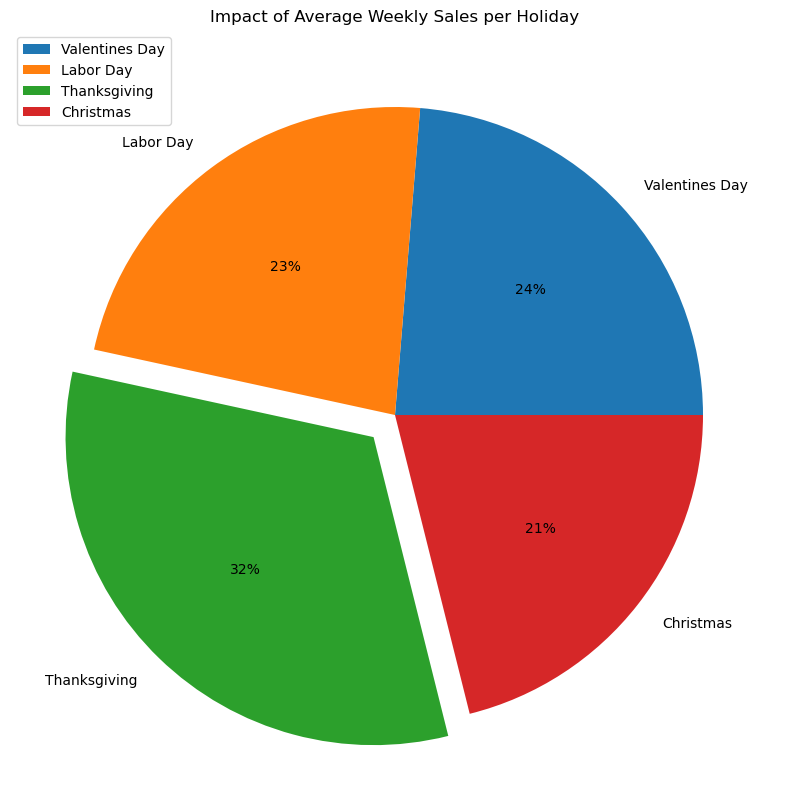

In [58]:
# Plotted and identified that on average, Thanksgiving has the most significant impact on sales

plt.figure(figsize=(15,10))

plt.pie(x = holiday_df['Average Sales'], explode = [0,0,0.1,0], labels = holiday_names, autopct='%.0f%%')

plt.title('Impact of Average Weekly Sales per Holiday')
plt.legend(loc = 'upper left')

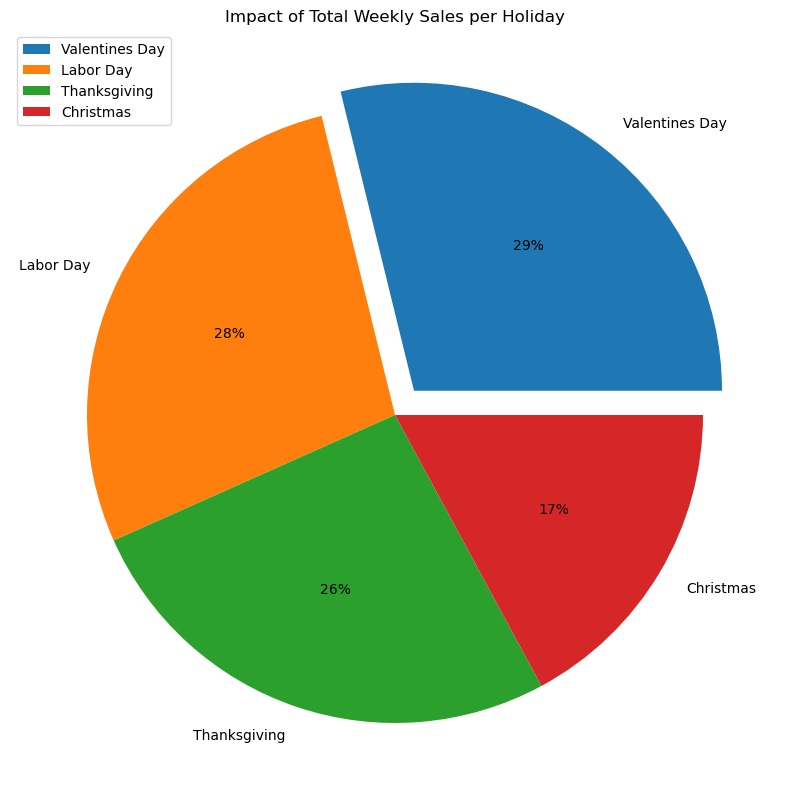

In [59]:
# Plot total sales

plt.figure(figsize=(15,10))

plt.pie(x = holiday_df['Total Sales'], labels = holiday_names, autopct= '%.0f%%', explode = [0.1,0,0,0])

plt.title('Impact of Total Weekly Sales per Holiday')
plt.legend(loc = 'upper left')

**Conclusion**
- The average number of weekly sales during non-holidays is $1,122,887 while the average number of weekly sales during holidays is $1,041,256. A difference of $81,631 in favor of non-holiday weeks
- With the average weekly sales of all weekly sales from 2010-2012 being $1,046,964, on average, non-holidays outperform holiday weekly sales by 8%
- Valentines day was the most profitable holiday in terms of total sales ($145,682,278)
- Thanksgiving was the most profitable in terms of average sales ($1,471,273)

**Relationship between Weather and Sales**
-
- Is there a correlation between temperature and weekly sales? 
- Determine if weather conditions have any significant effect on sales volumes.


In [60]:
# Identified the min and max temperature values

x = walmart_df['Temperature']
x.describe()

count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64

In [61]:
# Separated tempature values in inccrements of ten and calculated the average weekly sales for each increment

increment_temp_sales = []
increment_temp = ['-10-0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110']


def avgSales_per_temp(x,y):
    z = walmart_df[(walmart_df['Temperature'] >= x) & (walmart_df['Temperature'] <= y)]['Weekly_Sales'].mean().round()
    increment_temp_sales.append(z)

a = -10
b = 0

while a + b <= 210:
    avgSales_per_temp(a,b)
    a += 10
    b += 10

avgSales_per_temp_df = {
    'Temperature Increment': increment_temp,
    'Avg Sales per Increment': increment_temp_sales
}

avgSales_per_temp_df = pd.DataFrame(avgSales_per_temp_df)
display(avgSales_per_temp_df)


,Temperature Increment,Avg Sales per Increment
0,-10-0,558028.0
1,0-10,860892.0
2,10-20,848491.0
3,20-30,1062941.0
4,30-40,1127043.0
5,40-50,1113262.0
6,50-60,1037329.0
7,60-70,1056933.0
8,70-80,1062264.0
9,80-90,972035.0


Text(0.5, 0, 'Temperature Increments [fahrenheit]')

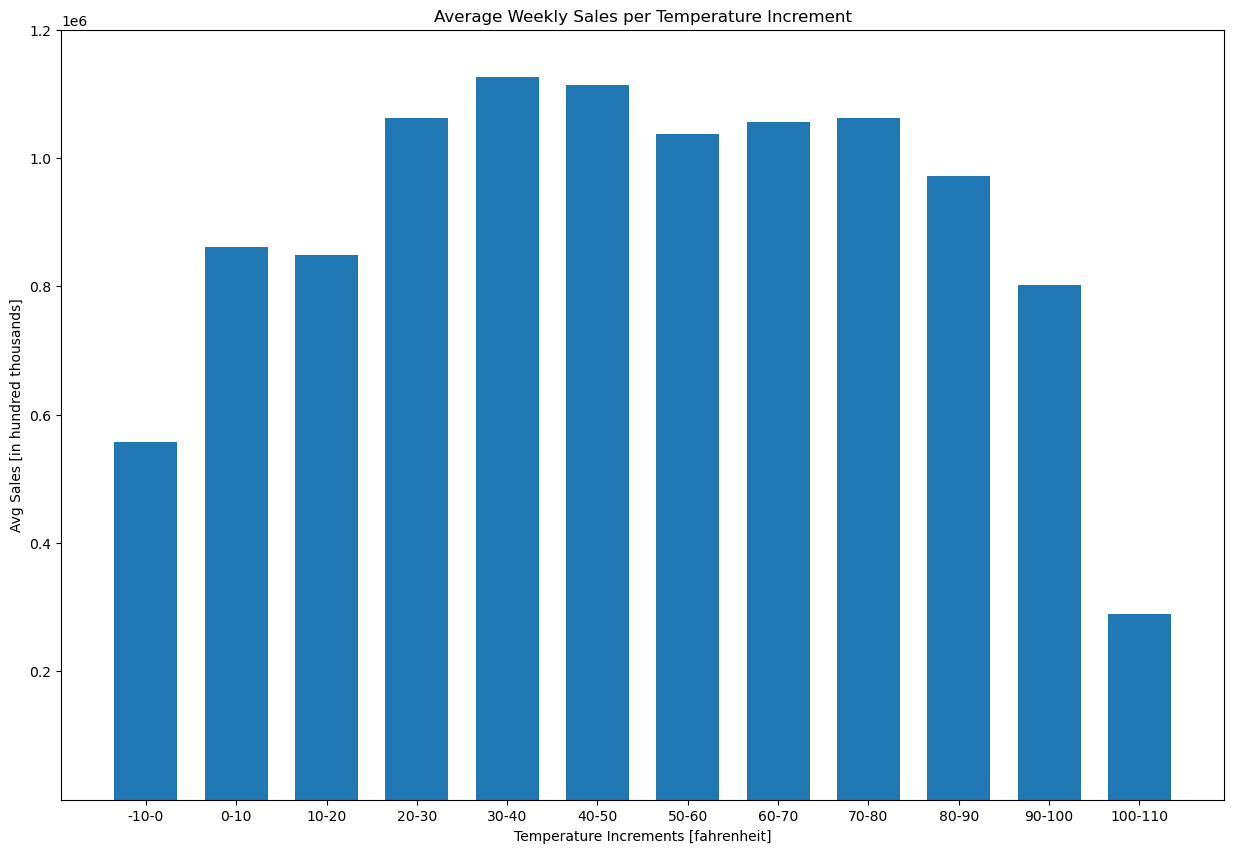

In [62]:

plt.figure(figsize = (15,10))
plt.bar(avgSales_per_temp_df['Temperature Increment'], avgSales_per_temp_df['Avg Sales per Increment'], width = 0.7)

plt.title('Average Weekly Sales per Temperature Increment')
plt.yticks([200000, 400000, 600000, 800000, 1000000, 1200000])
plt.ylabel('Avg Sales [in hundred thousands]')
plt.xlabel('Temperature Increments [fahrenheit]')


In [63]:
# Found the percent of each bar relative to the total of all bars

percent_sls = []
total_sls_inc = avgSales_per_temp_df['Avg Sales per Increment'].sum()

for i in avgSales_per_temp_df['Avg Sales per Increment']:
    aws = ((i/total_sls_inc) * 100).round(2)
    percent_sls.append(aws)
    
avgSales_per_temp_df['%'] = percent_sls
avgSales_per_temp_df


,Temperature Increment,Avg Sales per Increment,%
0,-10-0,558028.0,5.17
1,0-10,860892.0,7.98
2,10-20,848491.0,7.86
3,20-30,1062941.0,9.85
4,30-40,1127043.0,10.44
5,40-50,1113262.0,10.32
6,50-60,1037329.0,9.61
7,60-70,1056933.0,9.79
8,70-80,1062264.0,9.84
9,80-90,972035.0,9.01


In [64]:
# Identified the average percentage 

avg_p = avgSales_per_temp_df['%'].mean().round(2)
avg_p

8.33

In [65]:
# Identified temperature increments that are above the average

avg_p = avgSales_per_temp_df['%'].mean().round(2)

z = avgSales_per_temp_df[avgSales_per_temp_df['%'] > avg_p]
z

,Temperature Increment,Avg Sales per Increment,%
3,20-30,1062941.0,9.85
4,30-40,1127043.0,10.44
5,40-50,1113262.0,10.32
6,50-60,1037329.0,9.61
7,60-70,1056933.0,9.79
8,70-80,1062264.0,9.84
9,80-90,972035.0,9.01


In [66]:
# Identified temperature increments that are below the average

c = avgSales_per_temp_df[avgSales_per_temp_df['%'] < avg_p]
c

,Temperature Increment,Avg Sales per Increment,%
0,-10-0,558028.0,5.17
1,0-10,860892.0,7.98
2,10-20,848491.0,7.86
10,90-100,802638.0,7.44
11,100-110,289346.0,2.68


In [67]:
# Found that temperatures from 30-40 degrees have the highest percentage of sales

x = avgSales_per_temp_df[avgSales_per_temp_df['%'] == avgSales_per_temp_df['%'].max()]
x

,Temperature Increment,Avg Sales per Increment,%
4,30-40,1127043.0,10.44


In [68]:
# Found that teperatures from 100-110 degrees hace the lowest percentage of sales

y = avgSales_per_temp_df[avgSales_per_temp_df['%'] == avgSales_per_temp_df['%'].min()]
y

,Temperature Increment,Avg Sales per Increment,%
11,100-110,289346.0,2.68


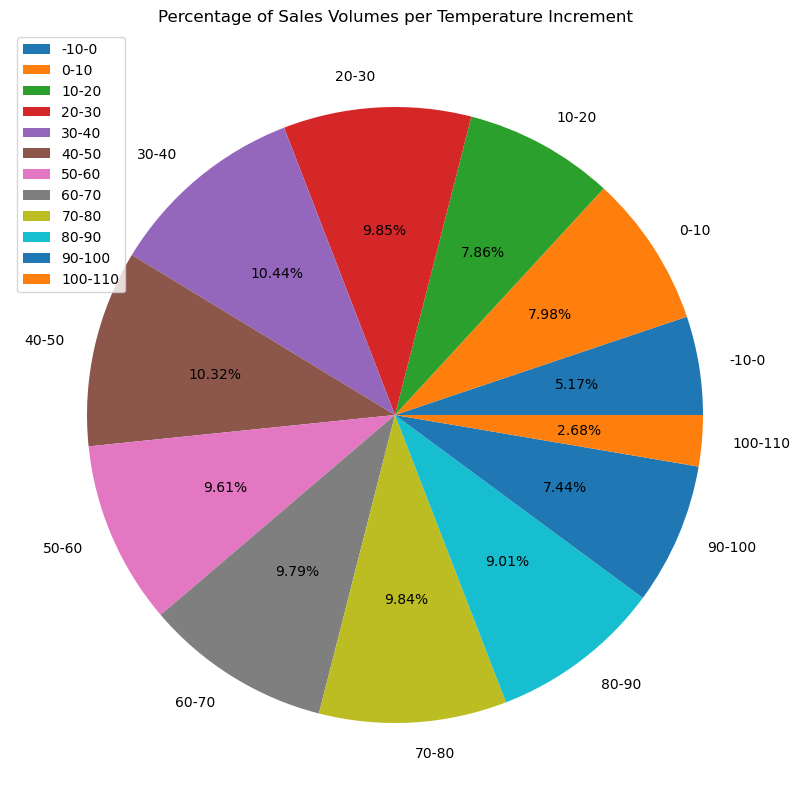

In [69]:
# Created a bar chart to visualize percentage of sales volumes for each temperature increment

plt.figure(figsize=(15,10))

plt.pie('%',
        data = avgSales_per_temp_df,
        labels = avgSales_per_temp_df['Temperature Increment'],
        autopct = '%1.2f%%'
)

plt.title('Percentage of Sales Volumes per Temperature Increment')
plt.legend()

**Conclusion**
- The average volume of sales among temperature increments is 8.33%
- Temperatures that ranges from 20-90 degrees are above this average while temperatures outside this range perform below average
- The best performing temperature increment is 30-40 degrees while the worse is 100-110 degrees
- Extreme lows and highs in temperature tend to have negative impacts on sales volumes


**Fuel Price Influence**
- 
- Analyze the impact of fuel prices on weekly sales. 
- Determine if there is a correlation and if higher fuel prices lead to lower sales.


In [70]:
# Found the Max and Min fuel prices

walmart_df['Fuel_Price'].describe()

count    6435.000000
mean        3.358607
std         0.459020
min         2.472000
25%         2.933000
50%         3.445000
75%         3.735000
max         4.468000
Name: Fuel_Price, dtype: float64

In [71]:
justFuel_Sales = walmart_df[['Store','Fuel_Price', 'Weekly_Sales']]
justFuel_Sales

,Store,Fuel_Price,Weekly_Sales
0,1,2.572,1643690.90
1,1,2.548,1641957.44
2,1,2.514,1611968.17
3,1,2.561,1409727.59
4,1,2.625,1554806.68
...,...,...,...
6430,45,3.997,713173.95
6431,45,3.985,733455.07
6432,45,4.000,734464.36
6433,45,3.969,718125.53


Text(0.5, 0, 'Fuel Prices')

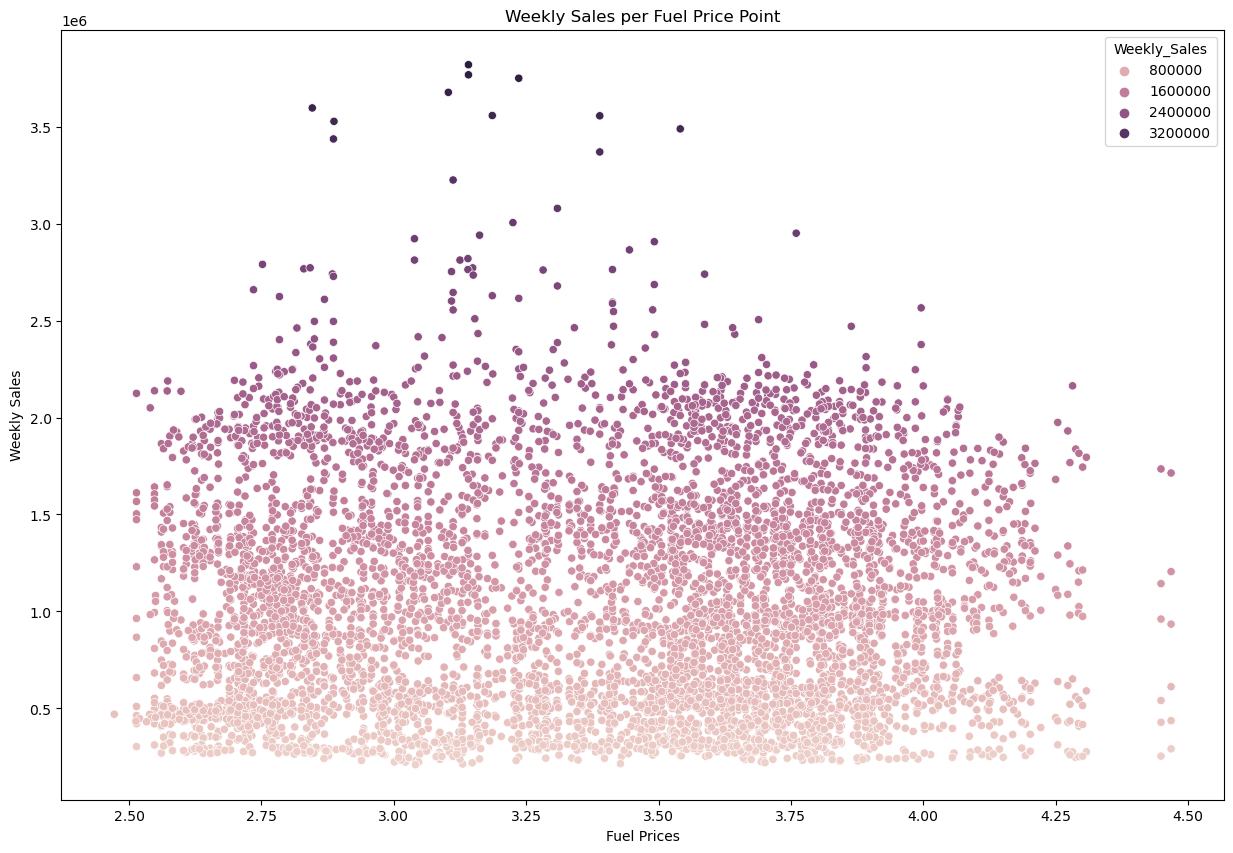

In [72]:
# Created a scatter plot and identified that as fuel prices increased, weekly sales and the frequency of sales decreased

plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Fuel_Price', y = 'Weekly_Sales', data = justFuel_Sales, hue = 'Weekly_Sales')

plt.title('Weekly Sales per Fuel Price Point')
plt.ylabel('Weekly Sales')
plt.xlabel('Fuel Prices')


In [73]:
# Created fuel price increments and identified the frequency of sales made per each increment

fuel_p_range = ['2.5-2.75', '2.75-3.00', '3.00-3.25', '3.25-3.50', '3.50-3.75', '3.75-4.00', '4.00 - 4.25', '4.25-4.50']

low = 2.5
high = 2.75
sale_count = []

def sales_volume(x,y):
    z = justFuel_Sales[(justFuel_Sales['Fuel_Price'] >= x) & (justFuel_Sales['Fuel_Price'] <= y)]['Weekly_Sales'].count()
    sale_count.append(z)
    
while high + low <= 8.75:
    sales_volume(low, high)
    low += 0.25
    high += 0.25
    
sale_count

[802, 1074, 763, 775, 1535, 1098, 361, 57]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


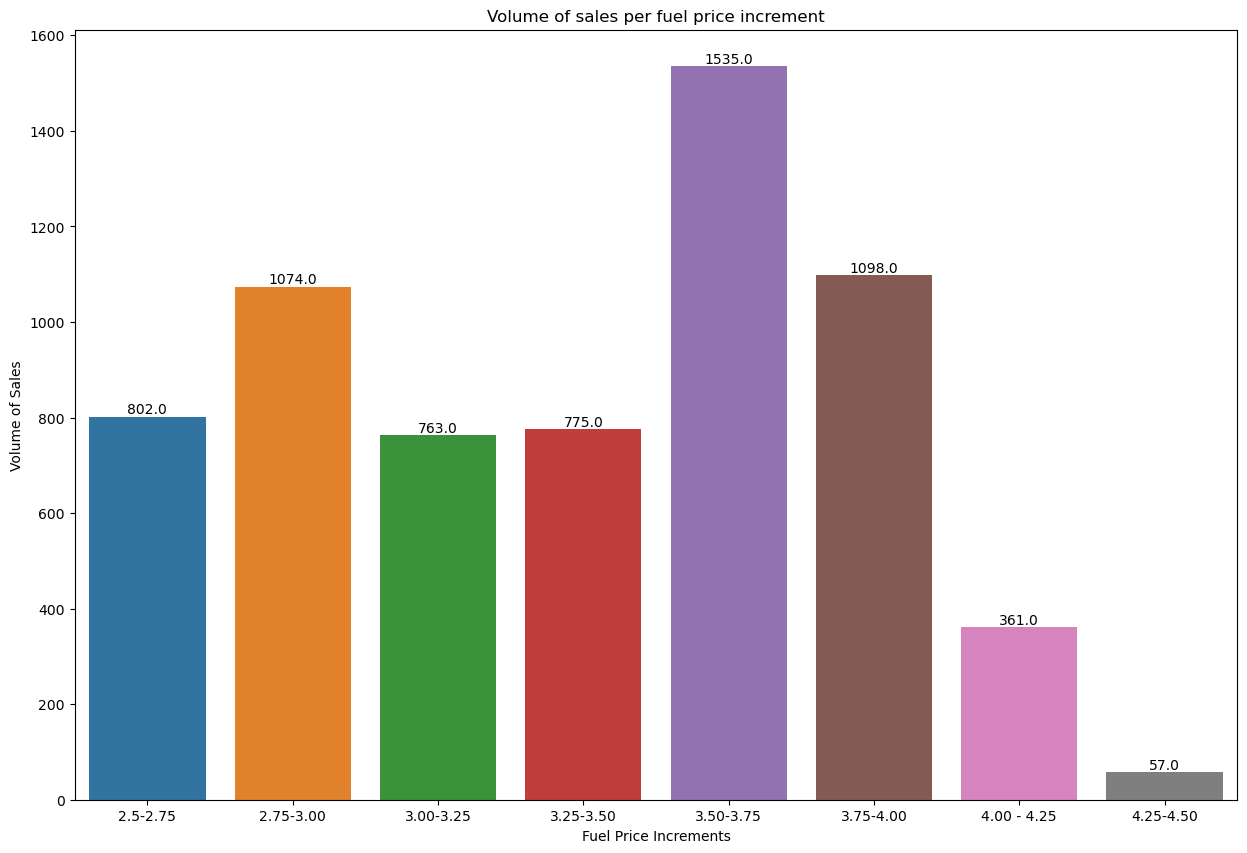

In [74]:
# Plotted a bar chart of for each increment
# Found that as fuel prices surpassed $4, the number of sales dramatically decreases 
# Higher fuel prices leads to a lower number of sales

plt.figure(figsize=(15,10))

bar = sns.barplot(x = fuel_p_range, y = sale_count)

plt.title('Volume of sales per fuel price increment')
plt.xlabel('Fuel Price Increments')
plt.ylabel('Volume of Sales')

for z in bar.patches:
    height = z.get_height()
    bar.text(
        z.get_x() + z.get_width()/2,
        height,
        f'{height}',
        ha = 'center',
        va = 'bottom'
    )

In [75]:
# Found the percent of each bar relative to the total of all bars

vol_fuel_sales = {
    'Fuel Price Increments': fuel_p_range,
    'Volume of Sales': sale_count
}

vol_fuel_sales = pd.DataFrame(vol_fuel_sales)

summ = np.array(sale_count).sum()
percent_of_tot = []

for i in sale_count:
    percent = ((i/summ) * 100).round()
    percent_of_tot.append(percent)

vol_fuel_sales['Percent of Total'] = percent_of_tot

vol_fuel_sales


,Fuel Price Increments,Volume of Sales,Percent of Total
0,2.5-2.75,802,12.0
1,2.75-3.00,1074,17.0
2,3.00-3.25,763,12.0
3,3.25-3.50,775,12.0
4,3.50-3.75,1535,24.0
5,3.75-4.00,1098,17.0
6,4.00 - 4.25,361,6.0
7,4.25-4.50,57,1.0


In [76]:
# Found the percent average 

percent_avg = vol_fuel_sales['Percent of Total'].mean()
percent_avg

12.625

In [77]:
# Identified all increments that fall below the percent average

t = vol_fuel_sales[vol_fuel_sales['Percent of Total'] < percent_avg]
t

,Fuel Price Increments,Volume of Sales,Percent of Total
0,2.5-2.75,802,12.0
2,3.00-3.25,763,12.0
3,3.25-3.50,775,12.0
6,4.00 - 4.25,361,6.0
7,4.25-4.50,57,1.0


In [78]:
# Identified all increments the outperformed the percent average

k = vol_fuel_sales[vol_fuel_sales['Percent of Total'] > percent_avg]
k

,Fuel Price Increments,Volume of Sales,Percent of Total
1,2.75-3.00,1074,17.0
4,3.50-3.75,1535,24.0
5,3.75-4.00,1098,17.0


**Conclusion**
- Fuel prices in the range of $3.50 - $3.75 and $3.75 - $4.00 had the most number of sales (1,535 and 1,098 respectively)
- The average percent of each increment relative to the total of all bars is 12.625%
- The range $2.50 - $3.50 offers slightly below average volume of sales at 12% each 
- Fuel prices that are above $4 have the least amount of sales with the increments $4.00 - $4.25 and $4.25 - $4.40 only capturing 6% and 1% of total sales volume respectively

**Economic Factors** 
-
- How do the CPI and unemployment rates affect weekly sales? 
- Evaluate the strength and nature of their relationships with sales figures.

In [97]:
econ_factors_df = walmart_df[['Store', 'Weekly_Sales', 'CPI', 'Unemployment']]
econ_factors_df

,Store,Weekly_Sales,CPI,Unemployment
0,1,1643690.90,211.096358,8.106
1,1,1641957.44,211.242170,8.106
2,1,1611968.17,211.289143,8.106
3,1,1409727.59,211.319643,8.106
4,1,1554806.68,211.350143,8.106
...,...,...,...,...
6430,45,713173.95,192.013558,8.684
6431,45,733455.07,192.170412,8.667
6432,45,734464.36,192.327265,8.667
6433,45,718125.53,192.330854,8.667


In [107]:
econ_factors_df[['CPI', 'Unemployment']].describe()

,Weekly_Sales,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000
mean,1.046965e+06,171.578394,7.999151
std,5.643666e+05,39.356712,1.875885
min,2.099862e+05,126.064000,3.879000
25%,5.533501e+05,131.735000,6.891000
50%,9.607460e+05,182.616521,7.874000
75%,1.420159e+06,212.743293,8.622000
max,3.818686e+06,227.232807,14.313000


<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

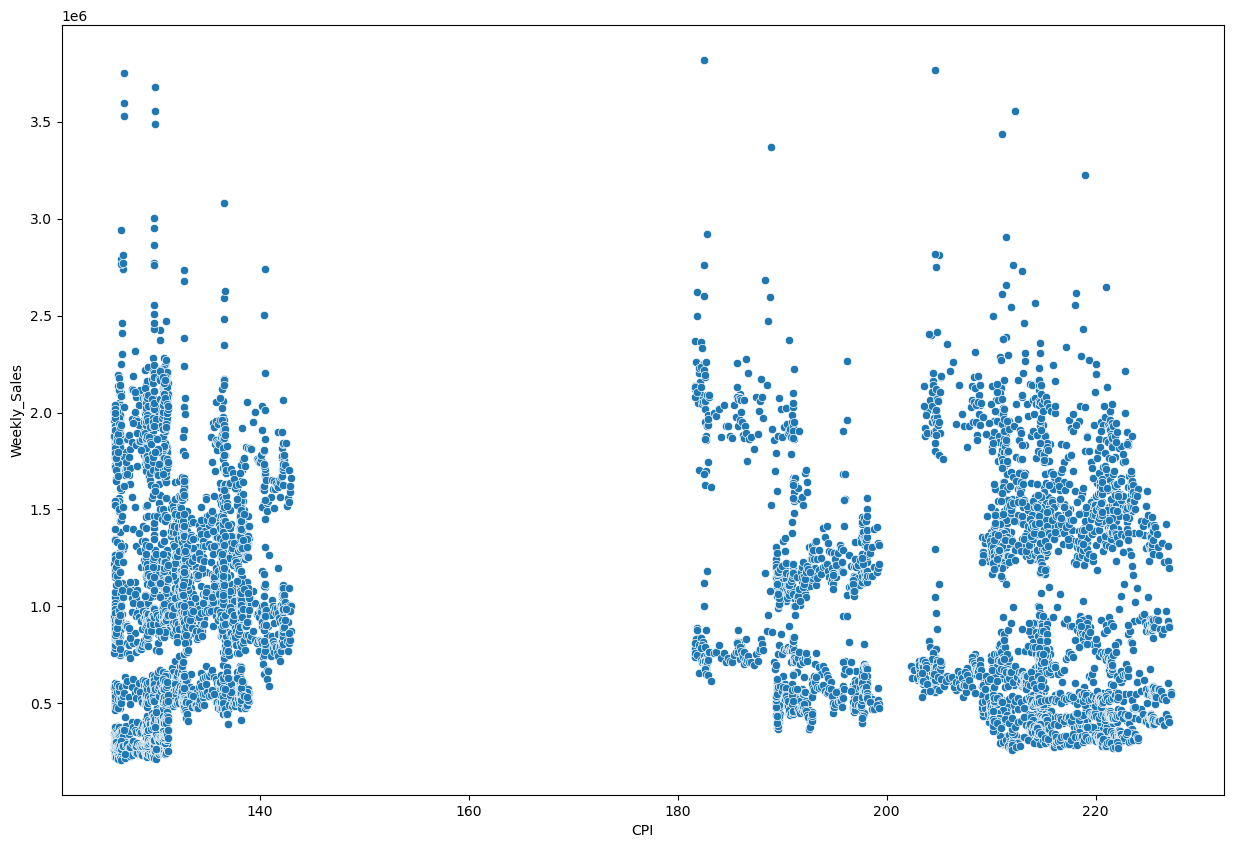

In [105]:
plt.figure(figsize=(15,10))

sns.scatterplot(data = econ_factors_df, x = 'CPI', y = 'Weekly_Sales')

In [ ]:

'''
Note:

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. 
Indexes are available for the U.S. and various geographic areas. 

Higher CPI indicates inflation

CPI tracks the rate of change in U.S. inflation over time. This key economic metric is based on prices that consumers pay for goods and services throughout the U.S. economy. 
The percentage change in CPI over a period of time is referred to as the inflation rate

'''

**Seasonal Sales Trends**
-
-  Are there any noticeable trends in sales over the months or seasons? 
- Identify patterns and potential reasons for any fluctuations.

**Store Comparison and Benchmarking**
-
-  Compare the stores based on their average sales, temperature sensitivity, and economic factor impacts. 
- Identify which stores are best at coping with economic changes and which are most affected by external factors. 